In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import tensorflow as tf
import os
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
Training_Path = os.path.join('/content/drive/MyDrive/flowerss/training') 

In [ ]:
Testing_Path = os.path.join('/content/drive/MyDrive/flowerss/testing') 

In [ ]:
Image_Size = 256

In [ ]:
#Batch Size
BATCH_SIZE = 32 

In [ ]:
# Data Augmentation
Training_data = ImageDataGenerator(
                rescale = 1./255, 
                rotation_range = 30, 
                vertical_flip=True) 


In [ ]:
Testing_data = ImageDataGenerator(
                rescale = 1./255) # Normalizing the image

In [ ]:
Train_set = Training_data.flow_from_directory(
                Training_Path,
                target_size=(Image_Size,Image_Size),
                batch_size=BATCH_SIZE,
                class_mode = 'categorical')

Found 3548 images belonging to 5 classes.


In [ ]:
Test_set = Testing_data.flow_from_directory(
                Testing_Path,
                target_size = (Image_Size,Image_Size),
                batch_size = BATCH_SIZE,
                class_mode = 'categorical')

Found 666 images belonging to 5 classes.


In [ ]:
labels_values,no_of_images = np.unique(Train_set.classes,return_counts = True)
dict(zip(Train_set.class_indices,no_of_images))
labels = Test_set.class_indices
labels = { v:k for k,v in labels.items() } # Flipping keys and values
values_lbl = list(labels.values()) # Taking out only values from dictionary

In [ ]:
# Defining all layers.
dense_layer = tf.keras.layers.Dense ## Define Dense layer
convolution = tf.keras.layers.Conv2D  ## Define convolutinal layer
max_pooling= tf.keras.layers.MaxPooling2D ## Define max_pooling layer
flattening = tf.keras.layers.Flatten() ## Define flattening layer
dropout = tf.keras.layers.Dropout(0.2)  ## Define dropout layer

In [ ]:
# Sequential Model
model = tf.keras.Sequential()
# 1st layer
model.add(convolution(16,(3,3),input_shape = (256,256,3),padding='same',activation='relu'))
model.add(max_pooling(2,2))

# 2nd layer
model.add(convolution(16,(3,3),padding='same',activation='relu'))
model.add(max_pooling(2,2))

# 3rd layer
model.add(convolution(32,(3,3),padding='same',activation='relu'))
model.add(max_pooling(2,2))

# 4th layer
model.add(convolution(32,(3,3),padding='same',activation='relu'))
model.add(max_pooling(2,2))

# 5th layer
model.add(convolution(32,(3,3),padding='same',activation='relu'))
model.add(max_pooling(2,2))

# Flatten Layerzxyuu7
model.add(flattening)

model.add(dense_layer(512,activation='relu',))
model.add(dropout)
model.add(dense_layer(256,activation='relu'))

# Output Layer
model.add(dense_layer(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
# Compiling model
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),metrics=['acc'] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
### Fitting the Model
cnn_network = model.fit_generator(Train_set,
                                    epochs=100,
                                    validation_data=Test_set,
                                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 105)])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
111/111 [==============================] - 782s 7s/step - loss: 1.3664 - acc: 0.3901 - val_loss: 1.1567 - val_acc: 0.4970
Epoch 2/100
111/111 [==============================] - 69s 621ms/step - loss: 1.1384 - acc: 0.5397 - val_loss: 1.3362 - val_acc: 0.4399
Epoch 3/100
111/111 [==============================] - 68s 616ms/step - loss: 1.0210 - acc: 0.5947 - val_loss: 1.0474 - val_acc: 0.5766
Epoch 4/100
111/111 [==============================] - 68s 611ms/step - loss: 0.9548 - acc: 0.6209 - val_loss: 0.9548 - val_acc: 0.6306
Epoch 5/100
111/111 [==============================] - 68s 611ms/step - loss: 0.9163 - acc: 0.6502 - val_loss: 0.9194 - val_acc: 0.6622
Epoch 6/100
111/111 [==============================] - 68s 611ms/step - loss: 0.8762 - acc: 0.6685 - val_loss: 0.9089 - val_acc: 0.6471
Epoch 7/100
111/111 [==============================] - 70s 628ms/step - loss: 0.8406 - acc: 0.6809 - val_loss: 0.8482 - val_acc: 0.6817
Epoch 8/100
111/111 [=============================

In [ ]:
model.evaluate(Test_set)

21/21 [==============================] - 4s 178ms/step - loss: 1.7011 - acc: 0.7477


[1.7011476755142212, 0.7477477192878723]

In [ ]:
#Save our model
model.save("first_one.h5")

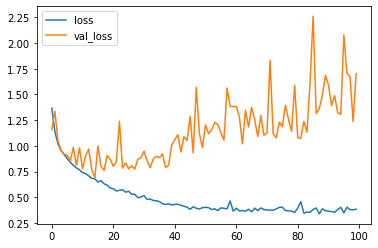

In [ ]:
## Accuracy comparison
plt.plot(cnn_network.history['loss'])
plt.plot(cnn_network.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

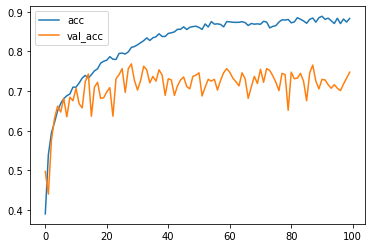

In [ ]:
plt.plot(cnn_network.history['acc'])
plt.plot(cnn_network.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()